In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import glob
from tabulate import tabulate
import pandas as pd


In [136]:
method = 3
folder = f"method{method}/"

select = ["0.5_5000", "0.5_500", "0.5_1000"]

heat_steps = [5000, 10000, 15000]
noise = [0.1, 0.5, 1]
rate = [500, 1000, 5000]
prefix = "_heat_"

# Heat map table for methods
entropies = []
col = []
for n in noise:
    for r in rate:
        row = [str(n) + "_" + str(r)]
        for step in heat_steps:
            name = str(n) + "_" + str(r) + "_heat_" + str(step) + ".npy"
            array = np.load(folder + name)
            row.append(entropy(array.ravel()))
        
        col.append(row)                  

In [137]:
data = pd.DataFrame(col, columns=["Noise", "5000", "10000", "15000"])
data

,Noise,5000,10000,15000
0,0.1_500,4.955466,5.014525,5.071547
1,0.1_1000,4.958548,5.001988,5.053410
2,0.1_5000,4.969055,4.983493,4.990866
3,0.5_500,4.698673,4.900127,4.989845
4,0.5_1000,5.125626,5.153482,5.140268
5,0.5_5000,5.012007,5.030069,5.086357
6,1_500,4.412932,4.779583,4.896316
7,1_1000,4.910281,4.945968,4.994852
8,1_5000,4.945780,5.081475,5.084254


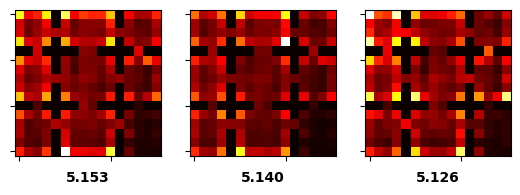

In [134]:
file_names = glob.glob(f"method{method}/*_heat_*.npy")
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 10, 'axes.titleweight': 'bold', 'axes.labelsize': 10, 'axes.labelweight': 'bold'})

select = ["0.5_5000", "0.5_500", "0.5_1000"]

fig, axs = plt.subplots(1, 3)
i = 0
for file in file_names:    
    rate = file.split("\\")[1].split("_")[-1]
    
    if "_".join(file.split("\\")[1].split("_")[:2]) in [select[method-1]] and int(rate.split('.')[0]) != 50000:
        array = np.load(file)
        axs[i].imshow(array, cmap='hot', interpolation='nearest')
        axs[i].set_xlabel(f"{entropy(array.ravel()):.3f}")
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        i += 1

fig.savefig(f"heat_method{method}",bbox_inches='tight',pad_inches=0.01,dpi=150) 


In [ ]:
# Plot scores
decays = [1000, 2000, 5000, 7000, 10000]
episodes = []
scores = []
for decay in decays:
    episodes.append(np.load(f"epsilon/{decay}_episodes.npy"))
    scores.append(np.load(f"epsilon/{decay}_score.npy"))
    
